
# Tutorial: Basics of Regression and Classification

----------
## BIOM 421

--------------
```
Authors: Zachary Fox, Will Raymond, Brian Munsky
```
<details>
  <summary>Copyright info</summary>

```
Copyright 2023 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>


# Package imports

In [1]:
# New packages that we are going to use in this notebook.
# Uncomment the following lines to install the packages.
# %pip install torch
# %pip install scikit-learn
# %pip install tdqm
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Learning Objectives

* Understand **what** are **Regression**,  **Classification**, and **Machine Learning**, and **when**/**why** to use these.
* Explore and practice at an introductory level the basics of machine learning by completing the following:
  * Perform a linear regression
  * Perform a regularized linear regression
  * Perform logistic regression
* Understand and explain at an introductory level some of the writing on machine learning ethics and best practices.


Some relevant books (with available PDFs):
  * [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), Christopher Bishop
  * [Probabilistic Machine Learning](https://probml.github.io/pml-book/book1.html), Kevin Patrick Murphy
  * [Data Modeling for the Sciences: Applications, Basics, Computations](https://www.amazon.com/Data-Modeling-Sciences-Applications-Computations/dp/1009098500/ref=sr_1_1?crid=3ACTTNI3IZ2SA&keywords=Steve+Presse+book&qid=1685627119&sprefix=steve+presse+boo%2Caps%2C317&sr=8-1), Steve Pressé and Ioannis Sgouralis.



### Lecture Overview

In this notebook and lecture, we are going to look at some supervised machine learning basics. Let's start off with a definition:

Machine learning (ML) is a class of mathematics and algorithms that learn an arbitrary model, $M$, from sample data, $\bar{X}$, to fit a target, $\bar{Y}$, usually by minimizing a given loss function, $L$. Sample data can be provided with or without explanatory labels. The model learned is not explicitly programmed, hence the name "Machine Learning." Broadly, ML falls under the umbrella of Artificial Intelligence, although that field has other disciplines besides ML.

Python is one of the most popular platforms for machine learning and the three main libraries used for machine learning are:

* [Tensorflow](https://www.tensorflow.org/)
* [PyTorch](https://pytorch.org/)
* [Sci-kit Learn](https://scikit-learn.org/stable/)

Tensorflow and Pytorch are the main packages for creating custom neural networks while Sci-kit learn focuses on providing common ML classifiers, such as SVM, K-means, Decision trees and many, many more. Pytorch and Tensorflow (as of 2022) account for roughly 50% and 25% of new machine learning repositories in GitHub, respectively. Much digital ink has been spilled extolling the pros and cons of each framework; however, we recommend that you use whichever package has previous models for your particular problem uncovered by a literature search.

![tf_vs_pytorch](https://raw.githubusercontent.com/MunskyGroup/uqbio2021/main/module_2/figures/pytorch_vs_tensorflow.png)


For the purposes of this notebook, we will be writing our own simple algorithms.  In subsequent lectures, we will give some demonstrations using PyTorch and Tensorflow.

## What are models, anyway?

TODO - Add slide here.

### The cannonical machine learning equation (X -> M -> Y)

In much of machine learning, we are faced with the challenge to  approximate some relationship:
$$\mathbf{X} \rightarrow \mathcal{M} \rightarrow \mathbf{Y}, $$
but you might wonder, what are these quantities $\mathbf{X}$, $\mathcal{M}$, and $\mathbf{Y}$?  That is a great question, because the real power of machine learning is that all three of these terms can mean a very large number of very different things for different problems, and yet the concepts and approaches to solve this problem can remain similar.  Let's define each in very general terms.

TODO - Add slide here

### "Input Features" ($\mathbf{X}$).

The matrix $\bar{X}_i$ is your **input feature data**; this is a collection of data that you can obtain to quantify each particular $i^{\rm th}$ sample, event or experiment. This can take many shapes, forms and sizes. One of the most common is an unordered vector of some arbitrary features. For example, one could imagine a classifier algorithm that takes inputs about a patient's currenty symptoms and demographics (perhaps we want to predict a probability that this patient has diabetes or another disease). That input data may be formatted as such:

\begin{equation}
  \bar{X} = [ \text{Int : Age}, \text{Int : Urinations per day},  \text{Float : Liters drank per day}, \text{Bool : Peripheral Numbness}]
\end{equation}

An example entry for the $i^{\rm th}$ patient may be:
\begin{equation}
  \bar{X}_i = [ 27, 6, 1.5, True ]
\end{equation}

When we have data on a large number of different samples, we typically order these features into a matrix with one row for each sample:

$$\mathbf{X} =\left[ \begin{matrix} \bar{X}_0 \\ \bar{X}_1 \\ \vdots \\ \bar{X}_{N-1} \end{matrix}\right]$$

Ordered datasets can come in many shapes ranging from something like text (1xN vector where sequence is important) to full 3D color movies (XYZ coordinates by Color channel by number of frames). All of these can be represented by an arbitrary tensor of the correct shape by number of entries in your dataset.

\begin{equation}
  Shape(\mathbf{X}) = Nsamples \times Dim_1 \times Dim_2 ... Dim_N
\end{equation}

#### Python example of input matrix for diabetes data set.

In [2]:
# Example of some input feature data for the diabetes dataset.
diabetes = datasets.load_diabetes()
dataDiabetes = diabetes.data
print(f'The various features in the diabetes data base are {diabetes.feature_names}')
print(f'The shape of the input matrix is {dataDiabetes.shape}')
print(dataDiabetes[0:5, :])

# Note that the variables are all scaled somewhat arbitrarilly in this data set.

The various features in the diabetes data base are ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
The shape of the input matrix is (442, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


Add Slide Here

### Target Labels ($\mathbf{Y}$)

The vector or matrix $\bar{Y}_i$ is your **target data** or **label data**; this is the end result or classification that you are trying to obtain or predict to describe the sample, event, or experiment. This can too take many shapes, forms, and sizes, and it might not even exist at all.

If the above data has a corresponding label (e.g., a known fact such as a statement saying whether the entries in your data truly have diabetes), your dataset is said to be **labeled**, and you can use **Supervised** machine learning techniques. 

In other machine learning problems, $\bar{Y}_i$ may not be specified. In this case, when your dataset has an absence of labels, then any approaches are said to be **Unsupervised.**

For now, we will focus on supervised learning, and we will assume that $\bar{Y}_i$ is known.  

#### Python example of Target Vectors for Diabetes data set.

In [3]:
# Load the target data from the diabetes dataset.
# The target data is a quantitative measure of disease progression one year after baseline.
targetDiabetesRegression = diabetes.target
print(f'The shape of the target data is {targetDiabetesRegression.shape}')
print(targetDiabetesRegression[0:5])

# Let's also define a binary target variable for classification, where we 
# only need to classify the disease progression as high or low.
targetDiabClass = np.zeros(targetDiabetesRegression.shape)
targetDiabClass[targetDiabetesRegression > 140] = 1
print(f'The shape of the target data is {targetDiabClass.shape}')
print(targetDiabClass[0:5])

The shape of the target data is (442,)
[151.  75. 141. 206. 135.]
The shape of the target data is (442,)
[1. 0. 1. 1. 0.]


### The Model ($\mathcal{M}$)

TODO: Add slide here

$\mathcal{M}$ in our definition is any arbitrary set of mathematical or logical operations that takes $\bar{X}_i$ as an input and then makes a guess for a corresponding $\bar{Y}_i$. 

When targets ($\bar{Y}$) are defined in advance and they take on continuous values (e.g., 2.345), we call this a **Regression** problem. When the targets take on discrete values (e.g., \{0,1,2\} or \{true,false\}, or \{cat, horse, dog\}), we call this a **Classification** problem.

The figure above shows a couple of common models and algorithms used for fitting data, and we will try a few over the next couple lessons, but this is **extremely** general, and statisticians and computer scientists are developing new models every day!

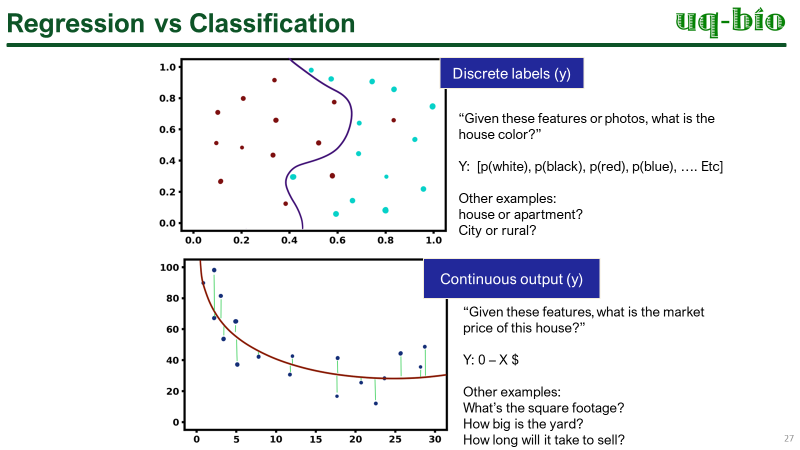

#### Regression

When the desired output is a continuous valued, then we are training a model to perform a regression. An example problem would be taking a dataset of house features $\bar{X}$ and their current market prices $\bar{Y}$ and training a model to produce predicted prices for other houses, $\tilde{Y} =  \mathcal{M}(\tilde{X})$.

To evealuate how good is our model, we typically employ a **loss function**, which is simply a function that takes the real targets $\bar{Y}_i$ and the predicted targets $\tilde{Y}_i$ and quantifies their difference. 

An appropriate *loss function* for this situation may be the mean squared error (MSE) for your predicted prices and the true prices (we will why this choice in a little bit when we return to the concept of likelihood functions):

\begin{align}
MSE &= \frac{1}{N}\sum_{i=0}^{N-1} (\tilde{Y}_i - \bar{Y}_i)^2\\
 &= \frac{1}{N}\sum_{i=0}^{N-1} (\mathcal{M}(\tilde{X}_i) - \bar{Y}_i)^2\\
\end{align}

The goal is to find a the best possible $\mathcal{M}$ to minimize this loss function.


#### Classification

$\bar{Y}$ is our target for our ML model to learn. If our input data label $Y$ is a set of discrete or boolean labels, then we are setting up a model to solve a classification problem. For example, training a classifier to tell if a picture contains a cat or a dog, our dataset would look like $\bar{X}$ of shape $[N, X,Y, RGB]$ and $Y$ our labels would be shape $[N]$ with labels 0 for a cat or 1 for a dog (or vice versa). Comparing true labels $Y$ with predicted labels $\bar{Y}$ is our model's loss function:

\begin{equation}
  \bar{L} = F(Y, \bar{Y})
\end{equation}

An appropriate selection for **loss function ** in this classification problem would be binary cross entropy:

\begin{equation}
  -\frac{1}{N} \sum_{i=1}^N Y_i*\log(p(Y_i)) + (1-Y_i)*\log(1-p(Y_i))
\end{equation}

This is very closely related to the log likelihood function for a binomial distribution as we will see later.

#### What characteristics makes for a good model?
Ideally, we want a model to be generalizable to new data. A good model acts as a map to its real world process. A good map doesn't show you every stone and blade of grass along the path, but instead the overarching **generalized** idea.

More generally, a good model in machine learning exhibits several key characteristics that contribute to its effectiveness in solving a given task. 
* **it should demonstrate high predictive accuracy**, meaning it can accurately generalize patterns from the training data to make accurate predictions on unseen data. 
* **it should be robust**, performing well across different datasets and under various conditions, indicating its ability to generalize beyond the training data. 
* **it should be interpretabile**, so stakeholders can understand and trust the model's decisions, especially in sensitive domains. 
* **it should be scalable** to handle large datasets efficiently and to accommodate potential increases in data volume. 
* **it should be computationally efficient,** striking a balance between complexity and performance to enable practical deployment in real-world applications.
* **it should be adaptable** to new data and evolving requirements, enabling iterative refinement and optimization to maintain its relevance and effectiveness over time.

Which of the six models below do you think would be considered a good model?

TODO - Add slide here.

-------
# Linear regression
See Bishop, Ch 3.

Let's start with features which _we assume_ are linearly related and define a function which multiplies each feature $x_i$ with a corresponding, unknown weight $w_i$, and adds them together:
$$
f(\mathbf{x},\mathbf{w}) = w_0 x_0 + w_1 x_1 + ... + w_D x_D
$$
Or in linear algebra terms:
$$
f(\mathbf{x},\mathbf{w}) = \mathbf{w}^{\rm T} \mathbf{x}
$$

## Linear function with matrix multiplication

Let's consider a matrix of $N$ data samples, in which each row is a sampled from a data distribution, $p(\mathbf{x})$, i.e $\mathbf{x}_k \sim p(\mathbf{x})$.

$$
\mathbf{X}=\begin{bmatrix}
\mathbf{x}_0^T \\
\mathbf{x}_1^T \\
\vdots \\
\mathbf{x}_N^T
\end{bmatrix}
$$

We want to apply the _same weights_ $\mathbf{w}$ to each example and return a predicted value, $\hat{y}_k$; this can be achieved through a matrix multiplication
$$
\hat{\mathbf{y}} = \mathbf{w}^T \mathbf{X}^T = \mathbf{X}\mathbf{w}
$$

Now, let's use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) to try a linear regression:

In [4]:
# Load the input data and target data from the diabetes dataset.
dataMatrix, targetVector = datasets.load_diabetes(return_X_y=True)

# How can we compute the number of features and number of data points?
numSamples, numFeatures = dataMatrix.shape

print(f'The number of samples is {numSamples}')
print(f'The number of features is {numFeatures}')

The number of samples is 442
The number of features is 10


## 🚨 LOSS FUNCTION TIME 🚨

Now, we want to define what is called the **loss function**, which is a fundamental concept in ML. The loss function is a function which:
   * when we take the derivative of it, can be used to update the weights of the model.
   * compares the predicted values of our model to ground truth values (supervised learning) OR takes some metric of the predicted values (unsupervised learning).
    
Constructing the loss function is a **design choice**; how we choose it can drastically affect the quality of our ML model.

## Likelihood approach

Because we are quantitative biologists, let us assume that the true data are given by our beautiful linear function, plus some real-world noise term $\epsilon$,
$$
y_{true} = f(\mathbf{x},\mathbf{w}) + \epsilon
$$
and that $\epsilon$ is a random number drawn from a normal distribution with mean 0 and variance $\sigma^2$.



Therefore, we can write the likelihood function of the true value given the model prediction for any input $\mathbf{x}$:

$$
p(y_{true} | \mathbf{x}, \mathbf{w}, \sigma^2 ) = \mathcal{N}(y_{true};f(\mathbf{x},\mathbf{w}),\sigma^2)
$$

and for all of samples as
$$
p(y_{true} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = \prod_{k=1}^K \mathcal{N}(y_{true};f(\mathbf{x}_k,\mathbf{w}),\sigma^2)
$$

**Question:** What assumption did we make here?  When would using the above equation be a bad idea in practice?

## log-likelihood

$$
\log p(y_{true} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = \sum_{i=1}^K \log \mathcal{N}(y_{true};f(\mathbf{x}_k,\mathbf{w}),\sigma^2)
$$
$$
\log p(y_{true} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = - \frac{K}{2} \log \sigma^2 -  \frac{K}{2} \log 2 \pi - \frac{1}{\sigma^2}  \sum_{k=1}^K \big( y_{true}-f(\mathbf{x}_k,\mathbf{w}) \big)^2
$$

Now, if we look at the last term, we can see that it looks a lot like the most common loss function used in regression, the **Mean Squared Error**, or MSE.
$$
\mathcal{L}_{\rm MSE}(\mathbf{X},\mathbf{w}) = \frac{1}{K} \sum_{k=1}^K \big( y_{true}-f(\mathbf{x}_k,\mathbf{w}) \big)^2
$$
Our goal is to find the model weights that **minimize** the MSE.

TODO - Add Rest of derivation here.

#### Python Example for Linear Regression

In [5]:
# Let's start by splitting the data into a training and testing set.
# We will use 80% of the data for training and 20% for testing.
# Partition the data into training and test sets, using random selection.
np.random.seed(0)
indices = np.random.permutation(numSamples)
splitIndex = int(numSamples*0.8)
training_inds, test_inds = indices[:splitIndex], indices[splitIndex:]
trainingData, testData = dataMatrix[training_inds,:], dataMatrix[test_inds,:]
trainingTarget, testTarget = targetVector[training_inds], targetVector[test_inds]

# Now, let's find the weights according to our derived expression
weights = np.linalg.inv(trainingData.T @ trainingData) @ trainingData.T @ trainingTarget

In [6]:
# Use the weights to predict the target data.
predTargetCustom = testData @ weights

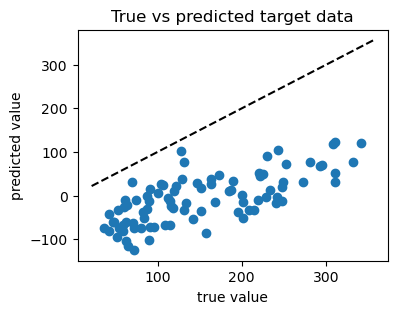

The R^2 score is -3.202930288790344


In [7]:
# Plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, predTargetCustom)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Hmmm,  This doesn't look so good.  
# Let's compute the R^2 score to quantify the fit.
# The R^2 score, also known as the coefficient of determination, is a measure of how well the
# observed outcomes are replicated by the model.  It is a number less than 1, with 1 indicating
# perfect fit. 
r2 = r2_score(testTarget, predTargetCustom)
print(f'The R^2 score is {r2}')
# Yuck, negative values can indicate that the model is worse than just using the mean of the target data!


In [8]:
# Let's see if we can do better by adding a bias term to the model.
# We can add a bias term by adding a column of ones to the input data matrix.
# This is equivalent to adding a constant to the input data.
X_biasTrain = np.hstack((trainingData, np.ones((trainingData.shape[0], 1))))
X_biasTest = np.hstack((testData, np.ones((testData.shape[0], 1))))

# find the weights according to our derived expression
w_bias = np.linalg.inv(X_biasTrain.T @ X_biasTrain) @ X_biasTrain.T @ trainingTarget
y_biasPredict = X_biasTest @ w_bias

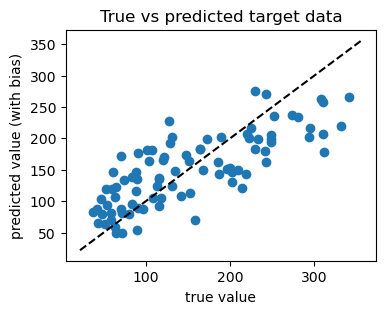

The R^2 score is 0.5950404994347174


In [9]:
# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value (with bias)')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_biasPredict)
print(f'The R^2 score is {r2}')

# That's better!  The R^2 score is now positive, indicating that the 
# model is better than just using the mean of the target data.


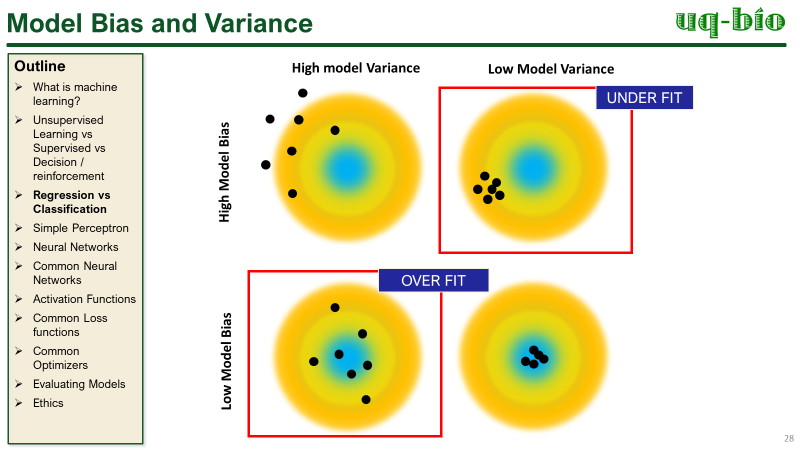

## Regularization
Sometimes, we don't want the weights of a model to be large, as it can lead to overfitting. We can penalize the weights of the model by modifying the MSE loss:
$$
\mathcal{L}_{\rm ridge}(\mathbf{X},\mathbf{w},\lambda) = \frac{1}{K} \sum_{k=1}^K \big( y_{true}-f(\mathbf{x}_k,\mathbf{w}) \big)^2 +\lambda \sum_{d=1}^{D+1}  w_d ^2
$$

$$
\mathcal{L}_{\rm ridge}(\mathbf{X},\mathbf{w},\lambda) = ( \mathbf{y}_{\rm true} - \mathbf{X} \mathbf{w} )^T( \mathbf{y}_{\rm true} - \mathbf{X} \mathbf{w} ) +  \lambda \mathbf{w}^T \mathbf{w}
$$

Here's the answer:
$$
\mathbf{w} = (\mathbf{X}^T \cdot \mathbf{X} + \lambda^2 I)^{-1}\mathbf{X}^T \cdot \mathbf{y}
$$

In [10]:
# find the weights according to our derived expression using the ridge regression
lam = np.sqrt(3)
w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + (lam**2)*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget
y_ridgeTest = X_biasTest @ w_ridge

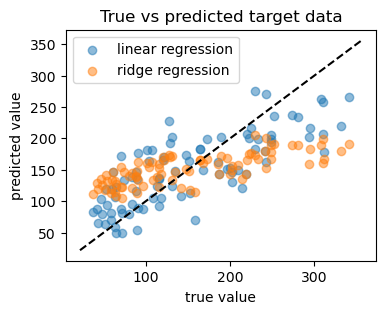

The R^2 score is 0.35540939859740994


In [11]:
# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict, alpha=0.5, label='linear regression')
ax.scatter(testTarget, y_ridgeTest, alpha=0.5, label='ridge regression')
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.legend()
ax.set_title('True vs predicted target data')

#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_ridgeTest)
print(f'The R^2 score is {r2}')


In [12]:
# Let's look at weights at different levels of lamba
# get the r2 score across multiple scores
lambs = np.logspace(-5,0.2,50)
all_train_scores = []
all_test_scores = []

# Partition the data into training and test sets, using random selection.
np.random.seed(0)

for lamb in lambs:
    w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + lamb*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget
    y_ridge_train = X_biasTrain @ w_ridge
    y_ridge_test = X_biasTest @ w_ridge
    all_train_scores.append(r2_score(trainingTarget, y_ridge_train))
    all_test_scores.append(r2_score(testTarget, y_ridge_test))

The best lambda is 0.019489285531480827


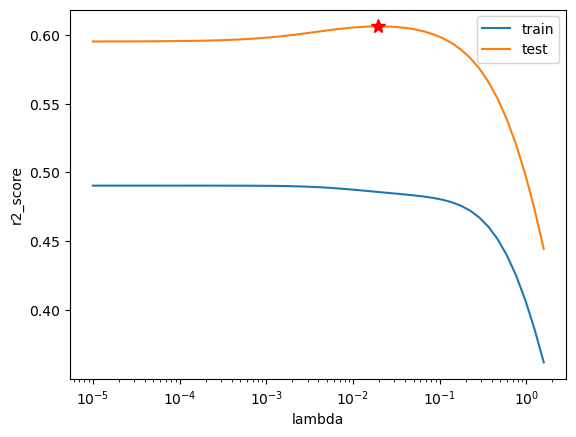

In [13]:
# look at train and test scores
f,ax = plt.subplots()
ax.plot(lambs, all_train_scores,label='train')
ax.plot(lambs, all_test_scores, label='test')
ax.legend()
ax.set_xlabel('lambda')
ax.set_ylabel('r2_score')
ax.set_xscale('log')

# find the best lambda
best_lambda = lambs[np.argmax(all_test_scores)]
print(f'The best lambda is {best_lambda}')

# Add star to the plot denoting the best lambda
ax.plot(best_lambda, np.max(all_test_scores), 'r*', markersize=10)
plt.show()


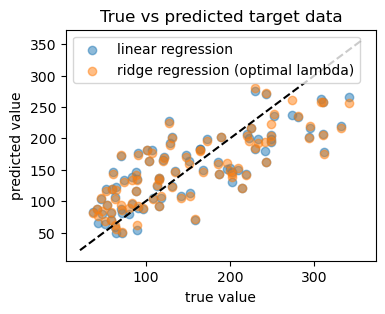

The R^2 score with optimized ridge regression is 0.6060532238555467


In [15]:
# Find the weights according to our derived expression using the ridge regression
w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + best_lambda*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget
y_ridgeOpt = X_biasTest @ w_ridge

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict, alpha=0.5, label='linear regression')
ax.scatter(testTarget, y_ridgeOpt, alpha=0.5, label='ridge regression (optimal lambda)')
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.legend()

ax.set_title('True vs predicted target data')

#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_ridgeOpt)
print(f'The R^2 score with optimized ridge regression is {r2}')

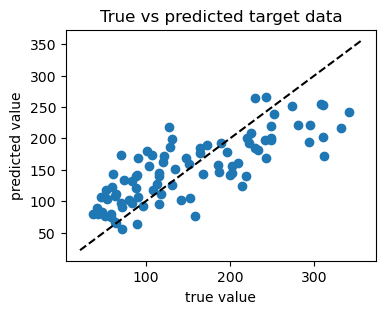

The R^2 score with lasso regression is 0.6007197232822947


In [16]:
# Other regularization methods
# Lasso regression (Least Absolute Shrinkage and Selection Operator or L1 regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_biasTrain, trainingTarget)
y_lasso = lasso.predict(X_biasTest)

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_lasso)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_lasso)
print(f'The R^2 score with lasso regression is {r2}')

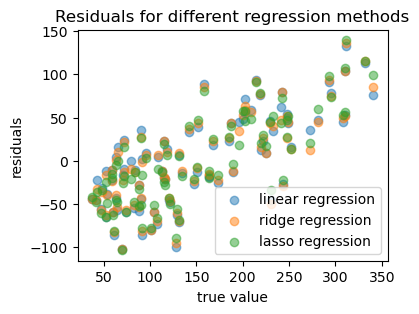

In [18]:
# Let's look at the residuals for each of the methods
# Linear regression
residuals_linear = testTarget - y_biasPredict
# Ridge regression
residuals_ridge = testTarget - y_ridgeOpt
# Lasso regression
residuals_lasso = testTarget - y_lasso

# Now, let's plot the residuals for each method
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, residuals_linear, alpha=0.5, label='linear regression')
ax.scatter(testTarget, residuals_ridge, alpha=0.5, label='ridge regression')
ax.scatter(testTarget, residuals_lasso, alpha=0.5, label='lasso regression')
ax.set_xlabel('true value'); ax.set_ylabel('residuals')
ax.legend()
ax.set_title('Residuals for different regression methods')
plt.show()


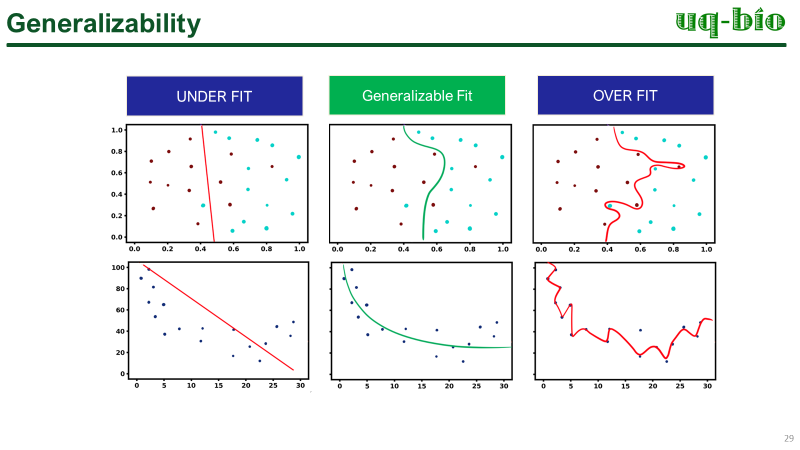

---------------
## Classification
---------------
$\bar{Y}$ is our target for our ML model to learn. If our input data label $Y$ is a set of boolean labels, then we are setting up a model to solve a classification problem. For example, training a classifier to tell if a picture contains a cat or a dog, our dataset would look like $\bar{X}$ of shape $[N, X,Y, RGB]$ and $Y$ our labels would be shape $[N]$ with labels 0 for a cat or 1 for a dog (or vice versa). Comparing true labels $Y$ with predicted labels $\bar{Y}$ is our model's loss function:

\begin{equation}
  \mathcal{L} = F(Y, \bar{Y})
\end{equation}

An appropriate selection for this classification problem would be binary cross entropy:

\begin{equation}
  -\frac{1}{N} \sum_{i=1}^N y_i \log(p(y_i)) + (1-y_i) \log(1-p(y_i))
\end{equation}

If you examine this closely, you will find that this loss function is again closely related to the log likelihood of the data given the model.

Let's try it out.

#### Python Example for Classification using Logistic Regression

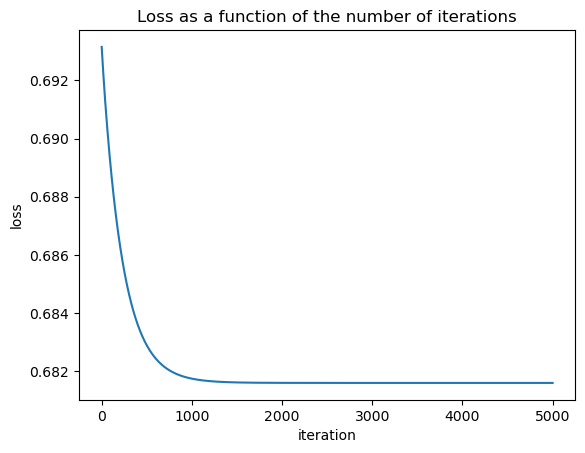

In [33]:
# Logistic regression
# Here we are going to demonstrate logistic regression on the diabetes data set.
# We will use the binary target variable for classification, where we
# only need to classify the disease progression as high or low.

# First, let's define the sigmoid function that maps from the real numbers (-inf,inf) to the interval [0,1].
# This is necessary to map the output of the linear regression to a probability.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Now, let's define the loss function for logistic regression. This is the cross-entropy loss function,
# which is a measure of how well the predicted probabilities match the true labels (i.e., the likelihood 
# of the data given the model parameters)
def logistic_loss(weights, X, y, lam):
    # Compute the predicted probabilities using the sigmoid function.
    probs = sigmoid(X @ weights)
    # Compute the loss using the cross-entropy loss function.
    loss = -np.mean(y * np.log(probs) + (1 - y) * np.log(1 - probs)) + lam * np.sum(weights**2)
    return loss

# Now, let's define the gradient of the loss function for logistic regression. This
# is the derivative of the loss function with respect to the weights, which is used to
# update the weights using gradient descent maximization of the likelihood of the data.
def logistic_gradient(weights, X, y, lam):
    # Compute the predicted probabilities using the sigmoid function.
    probs = sigmoid(X @ weights)
    # Compute the gradient of the loss function with respect to the weights.
    grad = X.T @ (probs - y) / X.shape[0] + 2 * lam * weights
    return grad

# Now, let's define a function to perform gradient descent for logistic regression. This
# function will take the input data, target data, regularization parameter, learning rate, and
# number of iterations as input, and return the weights and the loss at each iteration.
def gradient_descent_logistic(X, y, lam, learning_rate, num_iters, save_losses=False):
    # Initialize the weights to zero.
    weights = np.zeros(X.shape[1])
    # Create a list to store the loss at each iteration.
    losses = []
    # Perform gradient descent for a given number of iterations.
    for i in range(num_iters):
        # Compute the loss and gradient.
        loss = logistic_loss(weights, X, y, lam)
        grad = logistic_gradient(weights, X, y, lam)
        # Update the weights using the gradient and the learning rate.
        weights -= learning_rate * grad
        # Store the loss if the function is called with the save_losses argument.
        if save_losses:           
            losses.append(loss)
    return weights, losses

# Now, let's perform gradient descent to find the weights for logistic regression, and 
# plot the test accuracy as a funtion of the regularization parameter.
learning_rate = 0.1
num_iters = 5000
all_accuracy = []

# Let's run our code for a given choice of lambda
lamb = 0.01
weights, losses = gradient_descent_logistic(X_biasTrain, targetDiabClass[training_inds], lamb, learning_rate, num_iters, save_losses=True)

# Now, let's plot the loss as a function of the number of iterations to check for convergence.
f,ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.set_title('Loss as a function of the number of iterations')
plt.show()



In [38]:
# Now let's try again for many different values of lambda
lambs = np.logspace(-4,-1,50)
all_accuracy = []
for lamb in lambs:
    weights = gradient_descent_logistic(X_biasTrain, targetDiabClass[training_inds], lamb, learning_rate, num_iters)[0]

    # Now, let's use the weights to predict the target data.
    predTargetCustom = sigmoid(X_biasTest @ weights)

    # Now, let's make a classification decision based on the predicted probabilities.
    predTargetCustom = predTargetCustom >= 0.5

    # Let's compute the accuracy of the classification.
    all_accuracy.append(np.mean(predTargetCustom == targetDiabClass[test_inds]))


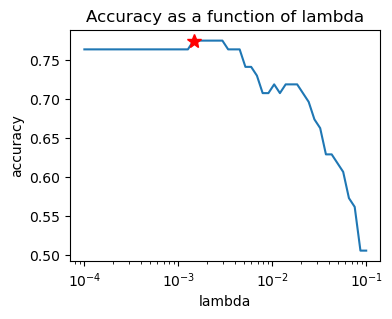

The best lambda is 0.0014563484775012444


In [39]:

# Now, let's plot the accuracy as a function of the regularization parameter.
f,ax = plt.subplots(figsize=(4,3))
ax.plot(lambs, all_accuracy)
# add a star to the plot denoting the best lambda
ax.plot(lambs[np.argmax(all_accuracy)], np.max(all_accuracy), 'r*', markersize=10)
ax.set_xlabel('lambda'); ax.set_ylabel('accuracy')
ax.set_xscale('log')
ax.set_title('Accuracy as a function of lambda')
plt.show()

# Let's find the best lambda
best_lambda = lambs[np.argmax(all_accuracy)]
print(f'The best lambda is {best_lambda}')


In [40]:

# Now, let's use the best lambda to find the weights for logistic regression.
weights = gradient_descent_logistic(X_biasTrain, targetDiabClass[training_inds], best_lambda, learning_rate, num_iters)[0]

# Now, let's use the weights to predict the target data.
predTargetCustom = sigmoid(X_biasTest @ weights)
predTargetCustom = predTargetCustom >= 0.5

# Let's compute the accuracy of the classification.
accuracyCustom = np.mean(predTargetCustom == targetDiabClass[test_inds])
print(f'The accuracy of our optimized custom classifier is {accuracyCustom}')


The accuracy of our optimized custom classifier is 0.7752808988764045


In [52]:
# Now, let's use the built-in logistic regression function from scikit-learn.
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l2', C=1/lam, max_iter=num_iters, solver='saga')
logisticRegr.fit(X_biasTrain, targetDiabClass[training_inds])
predTargetBuiltIn = logisticRegr.predict(X_biasTest)

# Let's compute the accuracy of the classification.
accuracyBuiltIn = np.mean(predTargetBuiltIn == targetDiabClass[test_inds])
print(f'The accuracy of the built-in classifier is {accuracyBuiltIn}')

The accuracy of the built-in classifier is 0.7865168539325843


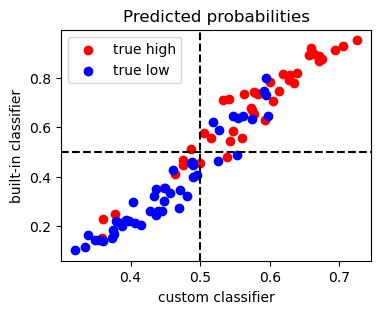

In [57]:
# Let's compare the probabilities predicted by our custom classifier and the built-in classifier.
probsCustom = sigmoid(X_biasTest @ weights)
probsBuiltIn = logisticRegr.predict_proba(X_biasTest)[:,1]

f,ax = plt.subplots(figsize=(4,3))
# Plot the predicted probabilities.  Use red for the true high values and blue for the true low values.
ax.scatter(probsCustom[targetDiabClass[test_inds]==1], probsBuiltIn[targetDiabClass[test_inds]==1], color='r', label='true high')
ax.scatter(probsCustom[targetDiabClass[test_inds]==0], probsBuiltIn[targetDiabClass[test_inds]==0], color='b', label='true low')
ax.set_xlabel('custom classifier'); ax.set_ylabel('built-in classifier')
ax.set_title('Predicted probabilities')
#Put lines at 0.5 on both axes
ax.axvline(0.5, color='k', linestyle='--')
ax.axhline(0.5, color='k', linestyle='--')
ax.legend()
plt.show()



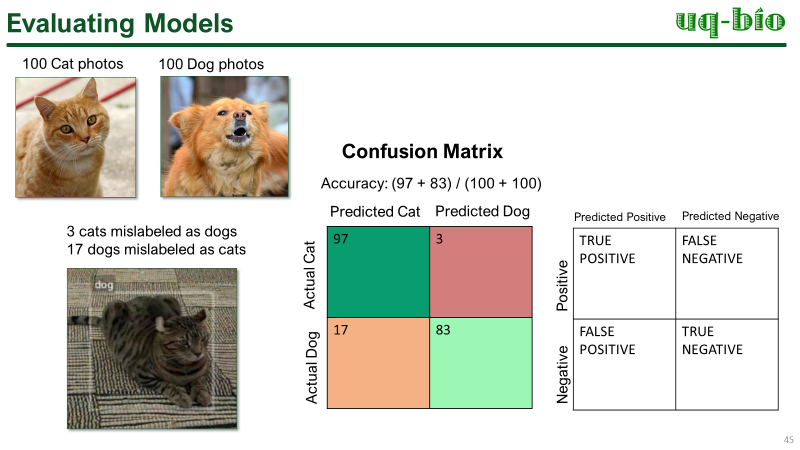

### Confusion Matrix

Balanced Accuracy vs. Unbalanced Metrics

While a balanced accuracy in general is a good call, specific applications may call for different so-called unbalanced metrics. Consider the following scenario:


> You are designing an antigen test for a disease like Sars-Cov-2. Would you rather have a balanced false positive and false negative rate? Or would you rather emphasize minimizing as many false negatives as possible? The consequences for a false positive are a person quarantines for some period of time or takes subsequent tests, whereas the consequences for a false negative is a person with an infectious disease not quarantining.

The reverse situation may also happen:

> Imagine a diagnostic test where the treatment from a positive diagnostic is intensive or dangerous. One would want to minimize the false positive rate as much as possible to avoid unnecessary treatments to healthy people.


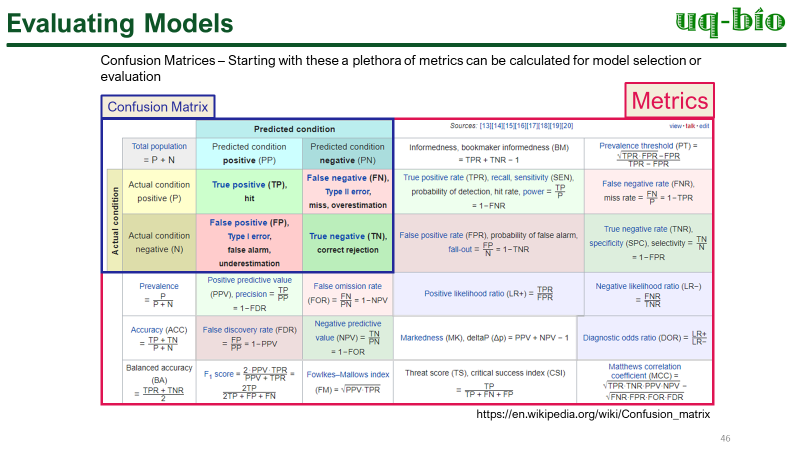

### Receiver Operator Characteristic (ROC curve)

Receiver Operator Characteristic Curves are constructed by plotting True Positive rate (TP / Total P) vs. False Positive Rate (FP / Total P).

An ROC is constructed by setting a stricter and stricter threshold for what is considered a positive label, starting from > 0.5 to > 0.999. Consider the following table:

| Actual Label |  Prediction Probability | Positive threshold | ( > 0.5)| ( > 0.75) | ( > 0.90) | ( > 0.95) |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |----------- |
| 1      | .85  |      | 1 | 1 | 0 | 0
| 0    |.5    |   | 0 | 0 | 0 | 0
| 1   |.98    |   | 1 | 1 | 1 | 1
| 1    |.7      | | 1 | 0 | 0 | 0
| 1    |.6      | | 1 | 0 | 0 | 0
| 0   |.3      || 0 | 0 | 0 | 0
| 0   |.2      || 0 | 0 | 0 | 0
| 0   |.01      || 0 | 0 | 0 | 0

|  |  ( > 0.5)| ( > 0.75) | ( > 0.90) | ( > 0.95) |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 1  | .5 | .25 | .25 |
| FPR | 1 | .33  | .43 |  .43 |






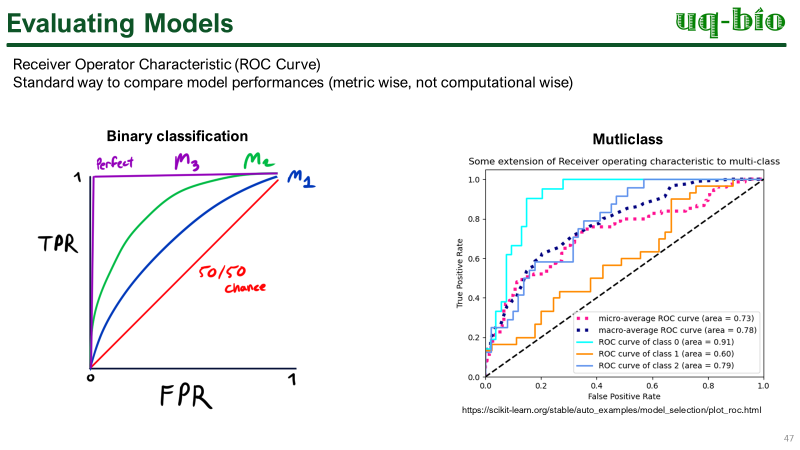

## Machine learning and Ethics

In computational biology, this usually does not become a consideration until you are creating diagnostic tools. Nevertheless, it is still good to run down some of the ethical considerations of training machine learning models of various types.


----------

**Common ethical considerations:**



#### **Reinforcement of Socioeconomic Trends**

Implementations of models for applications such as credit lines, recidivism rates, or hiring practices are especially prone to bias. In a sociologically-biased society, datasets are prone to contain that inherent bias. If that bias is present in the data, resulting models can recreate that bias with the added "benefit" of laundering responsibility through a perceived impartial third party actor.

Relying on biased models can serve to chill any social mobility and societal progress and mask discriminatory practices from public scrutiny for longer than if the bias was human derived. This effect is especially prevalent if a model is not constantly retrained. A model is learning on historical snapshot data and is out of date, yet can still be relied on for important, life-altering decisions concerning things such as housing, incarceration, or employment.



Additionally, access to these models may be limited to those nations, persons, or entities wealthy enough to utilize, train, and compute the models. For example, consider a machine learning suite focused on providing accurate market trading predictions that is also paywalled. Those already 1. wealthy enough to market trade, and 2. paid for the subscription are now privy and able to accrue more wealth than those starting from a lower capital amount, increasing the "activation energy" of economic mobility within that particular market.

----

Case study: [COMPRAS](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing),  an algorithm designed to predict risk of reoffending of a given incarcerated person, was systemically biased towards people of color and inaccurate in its predictions, and was heavily relied upon by judges in sentencing.

|  COMPRAS Prediction and True outcome    | White |  African American|
| ----------- | ----------- | ---- |
| Labeled High Risk, but did not re-offend      | 23.5%       | 44.9% |
| Labeled Low Risk, but did re-offend   | 47.7%        | 28.0%   |

#### **Entrenchment of Current Medical Paradigms**

Similar to the above points but from a medical perspective, supervised models are only as good as their generalizability and the data provided to them to learn. In fields like medicine (and also computational biology), care must be taken to remember at all times that these fields are constantly discovering new evidence, refining previous understanding, and revising old paradigms of treatment and knowledge. Models trained on snapshot data or on old feature sets are ill-suited to new or emerging diseases and poorly understood / historically underserved conditions. Adding in diagnostic machine learning models may add another obstacle when attempting to get adequate care.

For a thought experiment: consider the newly recognized condition called Alpha-Galactose Allergy (Tick-borne Mammalian meat allergy). Preliminary evidence of this condition emerged in the early 2000's and was unrecognized by doctors until circa 2008-2010. The presentation of this condition was varied, non-specific, and rare; these features prevented discovery until a specific cancer drug containing Alpha-Galactose caused several severe anaphylaxis cases, but only in geographic regions containing high rates of tick borne illness. Any sort of diagnostic contemporary machine learning based tool would have not caught this disease as it was not described and rare. Those with the condition may have been repeatedly rejected (more than they were) due to over-reliance on such a tool and discovery may have been masked for a longer period of time.







#### **Lacking or Missing Explanatory Outcomes**

Some machine learning models may only return a classification or confidence score + label. The lack of explanatory power can arise in black box situations when an explanation is needed. Consider popular CNNs trained to diagnose melanomas when compared to a dermatologist's recommendation. The dermatologist can point to many features and explain their decision of whether a blemish is benign or malignant: features like, roundness, color, size, hair, family history, occupational history. The CNN, unless it has been explicitly designed to return the information, may require a lot of scrutiny to reconstruct its "opinion" or decision making process. There is a plethora of ethical concerns one can list that may arise from a ML model without explanatory features:

  1. Obligation to provide explanatory care to patients
  2. Lack of transparency when explaining misdiagnosis for liability reasons
  3. Epistemic undermining of already existing experts and disciplines
  4. Perceived or real lack of personalized care and reassurance to the patients





#### **Incomprehensive and Imbalanced Datasets**

Datasets can be oversaturated or imbalanced with a particular type of statistic, leading to a lack of generalization and hyperspecialization by a given model. This is especially possible when big data is collected and is infeasible for entry by entry examination by a human. Computing summary statistics and studious understanding of your dataset before attempting machine learning is recommended.

Case Study: An imbalanced or biased dataset was used to train Twitter's thumbnail algorithm, which would focus on white people for attention over people of color. This has since been updated to select thumbnails based on arbitrary center cropping.


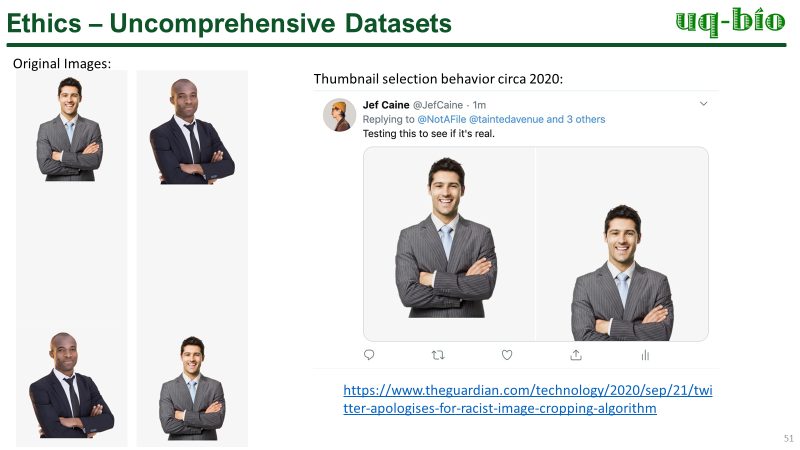

#### **Legal Gray Areas**

* Liability

  * Outcomes of machine learning models are a legal gray area in many countries. If a fully autonomous self driving car strikes a person or property, who is liable for damages? Is the car manufacturer negligent for all edge cases that an AI may encounter?

* Consent
  * Data privacy is a developing area of law, the [US currently as of 2022 has no federal guideline for personal data protections](https://www.nytimes.com/wirecutter/blog/state-of-privacy-laws-in-us/). Instead, America has specific laws like COPPA or HIPPA for specific data (children's data / healthcare data respectively for those two). This means actors in America are free to mostly build datasets without the consent of the people who generate that data. This is an ethical concern to right to privacy advocates since, often, even with anonymizing and barcoding, [entries can easily be tied to individuals.](https://techcrunch.com/2019/07/24/researchers-spotlight-the-lie-of-anonymous-data/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKfGXHUjL3AH6xAdh-MDG-eMsxVnFxbLsVNHXfqNx75V9VBzsfvnt7_QrgZqn1gatfLq2OXKPkPYlZfpTQD21UjDxx7FsPkq1vHLNSJSq6JhOb5hnQhBkIFe_mKtQY_b2F32T4Ke6ydgA0KBAd-0w3m0NvnujlBr0e1gEgm1-JJ9)

* Copyright
  * When training models on copyrighted works, such as artwork or written works, are the works produced by the ML model subject to copyright or derivatives? What if an ML model overfits one particular artist's work or style, such that it is reproducing works with 99.9% accuracy?


-------


Further Reading
<details>
  <summary>Click to Expand</summary>


----------------------------

Academic Papers:

* [Ethical principles in machine learning and artificial intelligence: cases from the field and possible ways forward](https://www.nature.com/articles/s41599-020-0501-9) - Overview and introduction to ML ethics with 2 case studies - Piano S. (Nature 2020)

* [The global landscape of AI ethics guidelines](https://www.nature.com/articles/s42256-019-0088-2) - Jobin et al. (Nature Machine Intelligence 2019) - Scoping review about the state of AI ethics.


* [The Ethics of AI Ethics: An Evaluation of Guidelines](https://link.springer.com/article/10.1007/s11023-020-09517-8) - Hagendorff (Minds and Machines 2020) - Article and systemic review about areas lacking in recent AI industry guidelines.

Academic Papers w/ focus on Medicinal practice:

* [Implementing Machine Learning in Health Care — Addressing Ethical Challenges](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5962261/) - Char et al. (The New England Journal of Medicine 2019)

* [On the ethics of algorithmic decision-making in healthcare](https://jme.bmj.com/content/46/3/205) - Grote et al (Journal of Medical Ethics 2019)

Industry White Papers:

* [How to Prevent Discriminatory Outcomes in Machine Learning](https://www3.weforum.org/docs/WEF_40065_White_Paper_How_to_Prevent_Discriminatory_Outcomes_in_Machine_Learning.pdf) - World Economic Forum white paper (2019)

* [The Malicious Use of Artificial Intelligence: Forcasting, Prevention, and Mitigation](https://arxiv.org/ftp/arxiv/papers/1802/1802.07228.pdf) - Future of Humanity Institute (2018)

</details>

In this notebook and lecture, we are going to look at some supervised machine learning basics. Let's start off with a definition:

Machine learning (ML) is a class of mathematics and algorithms that learn an arbitrary model, $M$, from sample data, $\bar{X}$, to fit a target, $\bar{Y}$, usually by minimizing a given loss function, $L$. Sample data can be provided with or without explanatory labels. The model learned is not explicitly programmed, hence the name "Machine Learning." Broadly, ML falls under the umbrella of Artificial Intelligence, although that field has other disciplines besides ML.

Python is one of the most popular platforms for machine learning and the three main libraries used for machine learning are:

* [Tensorflow](https://www.tensorflow.org/)
* [PyTorch](https://pytorch.org/)
* [Sci-kit Learn](https://scikit-learn.org/stable/)

Tensorflow and Pytorch are the main packages for creating custom neural networks while Sci-kit learn focuses on providing common ML classifiers, such as SVM, K-means, Decision trees and many, many more. Pytorch and Tensorflow (as of 2022) account for roughly 50% and 25% of new machine learning repositories in GitHub, respectively. Much digital ink has been spilled extolling the pros and cons of each framework; however, my personal best advice is to use whichever package has previous models for your particular problem uncovered by a literature search.

![tf_vs_pytorch](https://raw.githubusercontent.com/MunskyGroup/uqbio2021/main/module_2/figures/pytorch_vs_tensorflow.png)


For the purposes of this notebook, we will be using Tensorflow, which integrates nicely with Google Colab.




## Questions and Discussion

To receive credit, answer all of the following free response questions and at least 2 of the harder questions.


--------------------------
Easy Questions:

* Which type of machine learning returns out a continuous value output to match or predict something like a price?

* What is the difference between one-hot encoding and a label?

* What would you call a dataset where the features are not related to each other, i.e., you could shuffle the columns and have the same dataset?

* What is the difference between validation and cross validation?

* What is happening when you have very good accuracy on your training set but terrible accuracy on your validation set?

* What is happening when you have low model variance but high bias?

-------------------------------

Harder Questions:

* What final layer assumes the output labels are distinct, independent possibilities and will convert an activation to an independent probability across classes (output may not sum to 1)?

* What final layer assumes the output labels are concomitant possibilities and will convert an activation to joint probability across all classes (output sums to 1)?

* How would you train on a dataset that has overlapping labels? For example, imagine a dataset of shapes where your labels are [ circle, oval, rectangle, square], and some entries may have the one-hot label [1,1,0,0] for a perfect circle, while an oval will only have [0,1,0,0].

* Theres a trivial filter that can help out our FFNN, test different filters and then devise feature extractions for those filtered images that get a higher accuracy than 80% with a simple FFNN.

 -------------------
Discussion Questions for the Class:

* What do you do if you have no negative labels?

* What are some areas of ethical concern within your discipline using AI?

* What are some of your favorite ML models out there?


---------------------------

 Bonus questions (derivations):


* Derive the equation we use for solving directly for the linear regression weights that minimize the sum of squared errors.

\begin{equation}
W = (\bar{X}^T\cdot \bar{X})^{-1}\bar{X}^T \cdot \bar{Y} = pseudoinverse(\bar{X})*\bar{Y}
\end{equation}

starting from the formulation:
$
\begin{align}
\bar{Y} = W\cdot\bar{X}
\end{align}
$
\begin{align}
\mathbf{\bar{Y}} = \begin{bmatrix}
y_1&\\
y_2&\\
\vdots&\\
y_n&\\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_1&\\
w_2&\\
\vdots&\\
w_n&\\
\end{bmatrix}
\mathbf{\bar{X}} = \begin{bmatrix}
x_{1,1}& x_{1,2} &\cdots& x_{1,i}\\
x_{2,1}& \ddots & &\vdots&\\
\vdots& & \ddots&\\
x_{n,1}& \cdots& & x_{n,i}\\
\end{bmatrix}
\end{align}


for $n$ observations of $i$ features.

<details>
  <summary>HINT</summary>
 Write out the formula for the error between prediction Y_hat and Real value Y_bar and minimize the gradient of this formula.
<details>